<a href="https://colab.research.google.com/github/richieyuyongpoh/presentation/blob/main/Empowering_with_GenAI_A_Practical_Exploration_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empowering with GenAI: A Practical Exploration in R

Prepared by:

[Assoc. Prof. Ts. Dr. Yu Yong Poh](https://www.tarc.edu.my/staffDirectory.jsp?fstaff=yu+yong+poh)

Email: yuyp@tarc.edu.my

Linkedin: https://www.linkedin.com/in/yong-poh-yu/

Personal Website: https://www.richieyyptutorialpage.com/




## 1.0 Generative AI, ChatGPT, and R: A Powerful Combination

**What is Generative AI and ChatGPT?**

Generative AI (GenAI) is a branch of artificial intelligence focused on creating new content, such as text, images, audio, and code. It learns patterns from existing data and then uses this knowledge to generate similar, yet novel, outputs. ChatGPT is a prime example of this technology. Developed by OpenAI, ChatGPT is a large language model (LLM) that excels at understanding and generating human-like text.

<br>

**GenAI and Its Applications**

GenAI has the potential to revolutionize various fields, including:

* **Content Creation:** Automating the writing of articles, stories, and marketing materials.
* **Customer Service:** Providing instant and personalized support to customers.
* **Education:** Developing interactive learning materials and personalized tutoring systems.
* **Software Development:** Assisting in code generation and debugging.
* **Research:** Analyzing large datasets and generating insightful summaries.

<br>

**Introduction to ChatGPT: A Large Language Model**

ChatGPT is a powerful language model capable of engaging in natural conversations, translating languages, writing different kinds of creative content, and answering your questions in an informative way. Its versatility stems from being trained on a massive dataset of text and code, enabling it to understand and respond to a wide range of prompts and queries.

<br>

**The Potential of ChatGPT Across Diverse Fields**

ChatGPT's applications are vast and rapidly expanding. It can be used in various sectors, including:

* **Healthcare:** Providing medical information and support to patients.
* **Finance:** Analyzing financial data and assisting in investment decisions.
* **Law:** Summarizing legal documents and assisting in legal research.
* **Entertainment:** Creating interactive games and personalized entertainment experiences.

<br>

**Why R for ChatGPT?**

R is a widely used programming language for statistical computing and graphics. Combining the power of ChatGPT with R opens up new possibilities for data analysis, visualization, and reporting.

<br>

**Benefits of Integrating ChatGPT with R**

Integrating ChatGPT with R offers several benefits:

* **Automated Report Generation:** Generate insightful reports based on data analysis results automatically.
* **Data Exploration & Visualization:** Quickly generate code for exploring and visualizing data based on your description.
* **Enhanced Workflows:** Streamline tasks, from data manipulation to model development, through natural language interactions.
* **Collaboration & Communication:** Facilitate communication between data scientists and stakeholders through easily understandable reports and summaries.

<br>

**Introduction to the `openai` package in R**

Now that we've covered the basics of generative AI and ChatGPT, let's dive into how we can interact with it using the `openai` package in R. This package provides a seamless way to integrate ChatGPT into your R workflows, allowing you to send prompts and receive responses directly within your R environment.



In [3]:
# Install the openai package
install.packages("openai")

# Load the package
library(openai)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’




**Setting your API Key**


Before we can start interacting with ChatGPT, we need to set our OpenAI API key. Remember the key you obtained from the OpenAI website? We'll use it here.

For those who do not have the OpenAI API key, may use [my key](https://docs.google.com/document/d/193Nnoq3S5VChpGWurQBcqnKLpaKMmWR_xIhMUMOqLlk/edit?usp=sharing). Please take note that this key will be removed after the workshop.

In [ ]:
# Replace "YOUR_API_KEY" with your actual API key
Sys.setenv(OPENAI_API_KEY = "YOUR_API_KEY")


**Sending a Simple Prompt**

Let's start with a basic example. We'll ask ChatGPT a simple question: "What is the capital of Malaysia?"

In [8]:
# Create a completion request
response <- create_chat_completion(
  model = "gpt-4o-mini",
  messages = list(
    list(
      "role" = "user",
      "content" = "What is the capital of Malaysia?"
    )
  )
)



# Extract and print the response
print(response$choices$message.content)

[1] "The capital of Malaysia is Kuala Lumpur."


This code snippet sends the prompt "What is the capital of Malaysia?" to the "gpt-4o-mini" model, which is a powerful and efficient version of ChatGPT. The `create_chat_completion()` function handles the communication with the OpenAI API, and we extract the response from the response object.

<br>

**Understanding the Response**


The response object contains various information about the API call, including the generated text, usage information, and more. For now, we're interested in the `choices$message.content` field, which holds the text generated by ChatGPT.

In [9]:
# Explore the response object
str(response)

List of 7
 $ id                : chr "chatcmpl-AMGfrlVWlhRGliIfCupk3dSg8x7Si"
 $ object            : chr "chat.completion"
 $ created           : int 1729870675
 $ model             : chr "gpt-4o-mini-2024-07-18"
 $ choices           :'data.frame':	1 obs. of  6 variables:
  ..$ index          : int 0
  ..$ logprobs       : logi NA
  ..$ finish_reason  : chr "stop"
  ..$ message.role   : chr "assistant"
  ..$ message.content: chr "The capital of Malaysia is Kuala Lumpur."
  ..$ message.refusal: logi NA
 $ usage             :List of 5
  ..$ prompt_tokens            : int 14
  ..$ completion_tokens        : int 8
  ..$ total_tokens             : int 22
  ..$ prompt_tokens_details    :List of 1
  .. ..$ cached_tokens: int 0
  ..$ completion_tokens_details:List of 1
  .. ..$ reasoning_tokens: int 0
 $ system_fingerprint: chr "fp_f59a81427f"


**Crafting Better Prompts**

Try improving the prompts from the previous exercise to get more specific and interesting responses from ChatGPT.

<br>

**Chain-of-Thought (COT)**

 "Chain-of-Thought Prompting" enhances the reasoning abilities of large language models. This involves explicitly prompting the model to break down complex tasks into smaller, more manageable steps, similar to how humans think through problems.

In [22]:
# Load necessary libraries
library(openai)
library(dplyr)

# Sample data with more features (replace with your actual dataset)
data <- data.frame(
  Name = c("Alice", "Bob", "Charlie", "David", "Emily", "Frank", "Grace", "Henry"),
  Age = c(25, 30, 28, 22, 27, 40, 35, 29),
  City = c("New York", "London", "Paris", "Tokyo", "Sydney", "New York", "London", "Paris"),
  Salary = c(60000, 75000, 65000, 50000, 55000, 100000, 85000, 70000),
  Experience = c(2, 5, 3, 1, 2, 10, 7, 4)
)

# Comprehensive prompt
prompt <- paste(
  "First, describe the columns in this dataset:", paste(names(data), collapse = ", "),
  "Then, analyze the relationship between 'Age', 'Salary', and 'Experience' in the dataset. Do you observe any trends?",
  "Based on your analysis, are there any outliers in the dataset? If so, which data points are they and why?",
  "Finally, generate a comprehensive report summarizing the data, including the relationships between variables and any identified outliers. Also, suggest further analysis that could be performed.",
  sep = "\n"
)

# Send the comprehensive prompt
response <- create_chat_completion(
  model = "gpt-4o-mini",
  messages = list(
    list("role" = "user", "content" = prompt)
  )
)

# Print the response
cat(response$choices$message.content)

### Dataset Overview

The dataset contains the following columns:

1. **Name**: The name of the individual in the dataset.
2. **Age**: The age of the individual, typically reflecting their years of experience in the workforce.
3. **City**: The city where the individual resides, which may have implications for salary and job opportunities.
4. **Salary**: The income of the individual, likely influenced by factors such as age, experience, and city of employment.
5. **Experience**: The number of years the individual has worked, which can impact their salary and career progression.

### Relationship Analysis

Analyzing the relationships between 'Age', 'Salary', and 'Experience' can reveal insightful trends:

1. **Age vs. Salary**: Generally, as individuals age, they accumulate experience and skills, potentially leading to higher salaries. There may be an upward trend in salary with increasing age, particularly after a certain age threshold where seniority becomes more valued.

2. **Experien

To have better view, let us read the answer in this text cell, as shown below:

<br>

**Dataset Overview**

The dataset contains the following columns:

1. **Name**: The name of the individual in the dataset.
2. **Age**: The age of the individual, typically reflecting their years of experience in the workforce.
3. **City**: The city where the individual resides, which may have implications for salary and job opportunities.
4. **Salary**: The income of the individual, likely influenced by factors such as age, experience, and city of employment.
5. **Experience**: The number of years the individual has worked, which can impact their salary and career progression.

<br>

**Relationship Analysis**

Analyzing the relationships between 'Age', 'Salary', and 'Experience' can reveal insightful trends:

1. **Age vs. Salary**: Generally, as individuals age, they accumulate experience and skills, potentially leading to higher salaries. There may be an upward trend in salary with increasing age, particularly after a certain age threshold where seniority becomes more valued.

2. **Experience vs. Salary**: Experience is often directly correlated with salary. Individuals with more years in the workforce are likely to command higher salaries due to developed skills and a track record of performance. This correlation might be strong, especially in industries where expertise is critical.

3. **Age vs. Experience**: Typically, there is a direct correlation where age increases alongside experience; however, this can vary if individuals enter the workforce at different ages or if there are gaps in career history (e.g., due to further education, unemployment, etc.).

<br>

**Observed Trends**

- **Positive Correlation**: There is a positive correlation between age, experience, and salary. As people age, they tend to have more experience, which often translates into higher salaries.

- **Age Clusters**: There may be age clusters where certain age groups exhibit significantly different salary ranges, potentially indicating career stages (e.g., entry-level, mid-career, senior positions).

<br>

**Identification of Outliers**

To determine outliers, we would ideally apply statistical methods (e.g., Z-scores, IQR method) to define what constitutes an outlier in terms of age, salary, and experience.

1. **Outliers in Salary**: If there are individuals with salary figures significantly higher than the majority (e.g., 1.5 times the interquartile range above the third quartile), they could be considered outliers. These may include highly experienced professionals in specialized fields or executives.

2. **Outliers in Experience**: Individuals with exceptionally high experience but low salary may indicate an outlier scenario, possibly due to atypical employment patterns or underemployment situations.

<br>

**Comprehensive Report Summary**

The analysis of the dataset suggests that there are strong relationships among 'Age', 'Salary', and 'Experience'. Generally, as individuals age and amass experience, their salaries tend to increase. This trend may vary by city due to local economic conditions.

Identified outliers in the dataset—individuals with either exorbitantly high salaries for their age and experience (potentially leading positions) or uncharacteristically low salaries relative to their years of experience—underscore varying employment scenarios that may warrant further investigation.

<br>

**Suggestions for Further Analysis**

1. **Segment Analysis**: Examine relationships within specific age groups or cities to understand local economic conditions and industry-specific salary practices.

2. **Regression Analysis**: Conduct regression modeling to quantify the relationships between age, experience, and salary, which could provide insights into predictive factors for salary increases.

3. **Time Series Analysis**: If longitudinal data is available, assess how these relationships evolve over time, and look at trends across different economic contexts.

4. **Qualitative Factors**: Incorporate qualitative factors like industry, education level, and job role to create a more nuanced understanding of salary determinants.

This comprehensive view can help policymakers, businesses, and educators understand workforce dynamics better and make more informed decisions.

## 2.0 ChatGPT for Code Generation and Data Analysis

**Generating R Code**

ChatGPT can be a powerful tool for generating R code snippets for various tasks, from data manipulation to visualization and complex analysis. This section will demonstrate how to effectively utilize ChatGPT for code generation and optimization.

**Basic Code Generation:**

Simple tasks: Start by asking ChatGPT to generate code for simple tasks, like creating vectors, matrices, or data frames.

Example: "Generate R code to create a data frame with columns named 'Name', 'Age', 'Gender' and 'Income' and populate it with 100 sample entries."

Data manipulation: Use ChatGPT to generate code for data wrangling tasks using libraries like dplyr.

Example: "Write R code using dplyr to filter this dataframe to only include rows where the 'Age' column is greater than 30."

Visualization: Ask ChatGPT to create code for generating plots using libraries like ggplot2.

Example: "Generate R code using ggplot2 to create a scatter plot of 'Age' versus 'Income' from this dataframe, with points colored by 'Gender'

```R
# Load necessary packages
library(dplyr)
library(ggplot2)

# Create a data frame
data <- data.frame(
  Name = c("Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", "Ian", "Judy"),
  Age = c(25, 32, 45, 29, 31, 37, 22, 41, 34, 36),
  Gender = c("Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female"),
  Income = c(50000, 60000, 70000, 58000, 62000, 72000, 48000, 52000, 61000, 55000)
)

# Filter data frame where Age > 30
filtered_data <- data %>%
  filter(Age > 30)

# Create a scatter plot of Age versus Income colored by Gender
ggplot(filtered_data, aes(x = Age, y = Income, color = Gender)) +
  geom_point() +
  labs(title = "Scatter Plot of Age vs Income", x = "Age", y = "Income") +
  theme_minimal()
```

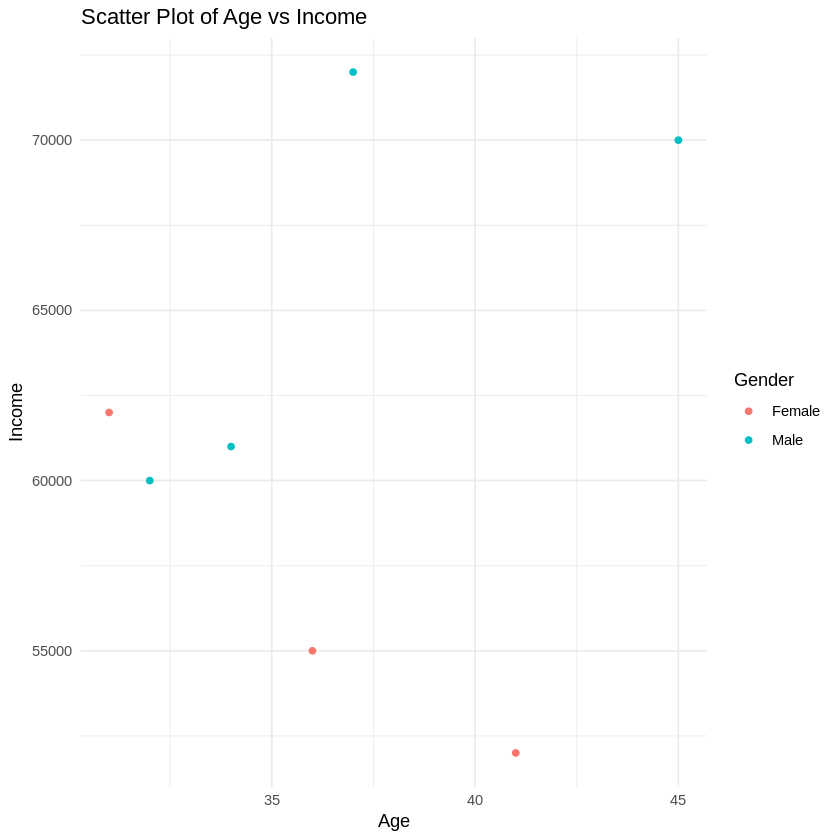

In [35]:
# Function to generate R code using ChatGPT
generate_r_code <- function(prompt) {
  response <- openai::create_chat_completion(
    model = "gpt-4o-mini",
    messages = list(
      list(
        role = "system",
        content = "You are a helpful R programming assistant.  You will be provided with a prompt describing a task, and you should generate the R code to accomplish that task. You just need to generate R codes without any English description."
      ),
      list(role = "user", content = prompt)
    )
  )
  return(response$choices$message.content)
}

# Example usage
user_prompt <- "Generate R code (including importing packages) to create a data frame with columns named 'Name', 'Age', \
'Gender' and 'Income' and populate it with 10 sample entries. Then, use dplyr \
to filter this data frame to only include rows where the 'Age' column is greater than 30. \
Finally, use ggplot2 to create a scatter plot of 'Age' versus 'Income' from this data frame, with points colored by 'Gender' "
generated_code <- generate_r_code(user_prompt)

# Print the generated code
cat(generated_code)

# Remove the triple backticks and any leading/trailing whitespace
cleaned_code <- trimws(gsub("```R?\n?|```", "", generated_code))

# Evaluate the generated code
# Be cautious when evaluating code from an LLM, as it might not always be correct or safe.
eval(parse(text = cleaned_code))

Above framework demonstrates a multi-agent architecture where ChatGPT acts as a code generation agent, responding to user queries with R code. The system then functions as an execution agent, evaluating the generated code and presenting the results to the user, creating a dynamic and interactive data analysis environment.

## 3.0 R Shiny Web App

Write an R Shiny app that allows users to upload multiple PDF files. The app should use the ChatGPT API to read and understand the PDFs and answer user questions based on them. It must only answer questions with information explicitly stated in the PDFs.  If a user asks a question not covered in the uploaded documents, the app should politely inform them that it cannot answer.

For the following activity, we will use RStudio to develop the R code. You can use either a local installation of RStudio (on your desktop) or [RStudio/Posit Cloud](https://posit.cloud/).

Execute the following codes in RStudio. Follow the subsequent instructions

In [ ]:
library(shiny)
library(openai)
library(pdftools)

# Set your OpenAI API key
Sys.setenv(OPENAI_API_KEY = "YOUR_API_KEY")

ui <- fluidPage(

  # Application title
  titlePanel("Multi-PDF Chat with ChatGPT"),

  sidebarLayout(
    sidebarPanel(
      fileInput("pdf_files", "Upload PDFs", multiple = TRUE, accept = c(".pdf")),
      textInput("user_question", "Ask a question:", placeholder = "Enter your question here"),
      actionButton("submit", "Submit")
    ),

    mainPanel(
      h4("Chat History:"),
      verbatimTextOutput("chat_history", placeholder = TRUE)
    )
  )
)

server <- function(input, output, session) {

  # Reactive value to store the chat history
  chat_history <- reactiveVal("")

  observeEvent(input$submit, {

    # Check if any PDFs are uploaded
    if (is.null(input$pdf_files)) {
      # Show a warning message if no PDFs are uploaded
      chat_history("Please upload at least one PDF file first.")
      return()
    }

    # Get the uploaded PDFs
    pdf_paths <- input$pdf_files$datapath

    # Extract text from all PDFs
    all_text <- ""
    for (path in pdf_paths) {
      all_text <- paste(all_text, paste(pdf_text(path), collapse = " "))
    }

    # Check if all_text is empty
    if (trimws(all_text) == "") {
      chat_history("The uploaded PDFs do not contain any extractable text.")
      return()
    }

    # Get the user's question
    question <- input$user_question

    # Construct the prompt for ChatGPT
    prompt <- paste(
      "Answer the following question based only on the information provided in the text below. ",
      "If the answer is not contained in the text, politely refuse to answer. \n\n",
      "Text: \n", all_text, "\n\n",
      "Question: ", question
    )

    # Use the OpenAI API to get the answer
    response <- openai::create_chat_completion(
      model = "gpt-4o-mini",
      messages = list(
        list(
          role = "user",
          content = prompt
        )
      )
    )

    # Extract the answer from the response
    answer <- response$choices$message.content

    # Update the chat history
    chat_history(paste(chat_history(), "You:", question, "\n", "ChatGPT:", answer, "\n\n"))

    # Clear the question input field
    updateTextInput(session, "user_question", value = "")
  })

  output$chat_history <- renderText({
    chat_history()
  })
}

# Run the application
shinyApp(ui = ui, server = server)

Activity:

Upload the [`Exploring Data Using R.pdf`](https://drive.google.com/file/d/1j-icWPpk51n1RKgSd1sCyqdA_BOfiTg1/view?usp=drive_link) , an e-book written by [Prof. Dr. Kamarul Imran Musa and Dr. Wan Nor Arifin](https://github.com/drkamarul/our_book) , to the web app. Ask some questions and observe the answers generated by the AI.

You may try to ask the following questions:

- Who are the authors
- What is this document all about
- Tell me what is the best way to do EDA. Give me the summary. Include the reference (eg: which chapter).

## 4.0 A more Professional and Structured R Shiny Layout

Execute the following codes using RStudio. Follow the subsequent instruction.

In [ ]:
library(shiny)
library(openai)
library(pdftools)
library(shinydashboard)

# Set your OpenAI API key
Sys.setenv(OPENAI_API_KEY = "YOUR_API_KEY")


ui <- dashboardPage(
  dashboardHeader(title = "Chat with Your Docs"),
  dashboardSidebar(
    h3("Welcome to", class = "text-center"),
    h3(a("Chat with Your Docs", href="#", style="font-weight: bold; color: #007bff; text-decoration: none;"), class = "text-center"),
    p("This app allows you to ask questions about your PDF documents and get answers generated by AI.", class = "text-left"),
    hr(), # Horizontal line for visual separation
    h4("Instructions", class = "text-center"),
    p("1. Upload one or more PDF files.", class = "text-left"),
    p("2. Type your question in the 'Ask Your Question' box.", class = "text-left"),
    p("3. Click 'Submit' to get an answer generated by AI.", class = "text-left"),
    hr(),
    h4("Reference", class = "text-center"),
    p(a("A.P. Ts. Dr. Yu Yong Poh", href="https://www.tarc.edu.my/staffDirectory.jsp?fstaff=yu+yong+poh", target="_blank"), class = "text-left"), # Hyperlink for name
    p(a("yuyp@tarc.edu.my", href="mailto:yuyp@tarc.edu.my"), class = "text-left"), # Hyperlink for email
    hr(),
    fileInput("pdf_files", "Upload PDFs", multiple = TRUE, accept = c(".pdf"),
              buttonLabel = "Browse...", placeholder = "No files selected")
  ),
  dashboardBody(
    tags$head(
      tags$style(
        "#chat_history {
          white-space: pre-wrap;
          word-wrap: break-word;
          font-size: 16px;
          padding: 15px;
          border: 1px solid #ccc;
          border-radius: 5px;
          height: 400px;
          overflow-y: scroll;
        }"
      )
    ),
    fluidRow(
      box(
        title = "Ask Your Question",
        status = "warning",
        solidHeader = TRUE,
        width = 12,
        textInput("user_question", NULL, placeholder = "Enter your question here"),
        actionButton("submit", "Submit", class = "btn-primary btn-block")
      )
    ),
    fluidRow(
      box(
        title = "Chat History",
        status = "primary",
        solidHeader = TRUE,
        width = 12,
        verbatimTextOutput("chat_history", placeholder = TRUE)
      )
    )
  )
)

server <- function(input, output, session) {

  # Reactive value to store the chat history
  chat_history <- reactiveVal("")

  observeEvent(input$submit, {

    # Check if any PDFs are uploaded
    if (is.null(input$pdf_files)) {
      # Show a warning message if no PDFs are uploaded
      chat_history("Please upload at least one PDF file first.")
      return()
    }

    # Get the uploaded PDFs
    pdf_paths <- input$pdf_files$datapath

    # Extract text from all PDFs
    all_text <- ""
    for (path in pdf_paths) {
      all_text <- paste(all_text, paste(pdf_text(path), collapse = " "))
    }

    # Check if all_text is empty
    if (trimws(all_text) == "") {
      chat_history("The uploaded PDFs do not contain any extractable text.")
      return()
    }

    # Get the user's question
    question <- input$user_question

    # Construct the prompt for ChatGPT
    prompt <- paste(
      "Answer the following question based only on the information provided in the text below. ",
      "If the answer is not contained in the text, politely refuse to answer. \n\n",
      "Text: \n", all_text, "\n\n",
      "Question: ", question
    )

    # Use the OpenAI API to get the answer
    response <- openai::create_chat_completion(
      model = "gpt-4o-mini",
      messages = list(
        list(
          role = "user",
          content = prompt
        )
      )
    )

    # Extract the answer from the response
    answer <- response$choices$message.content

    # Update the chat history
    chat_history(paste(chat_history(), "You:", question, "\n", "ChatGPT:", answer, "\n\n"))

    # Clear the question input field
    updateTextInput(session, "user_question", value = "")
  })

  output$chat_history <- renderText({
    chat_history()
  })
}

# Run the application
shinyApp(ui = ui, server = server)

**Activity:**

Deploy the app to [shinyapps.io](https://shinyapps.io/). Share your link.

Reference:

https://www.richieyyptutorialpage.com/demo-r-series/chat-with-your-docs

or

https://richieyyp5.shinyapps.io/ChatWithYourDocuments/

Thinking Corner:

 We now have access to no-code AI tools like ChatGPT and Gemini. So, why would we choose to use APIs instead?